## Multiscale Dynamic Human Mobility Flow Dataset in the U.S. during the COVID-19 Epidemic

Monitoring dynamic human mobility changes and travel flow patterns at different geographic scales is crucial for understanding human behavior changes during the COVID-19 pandemic. The open data created by the GeoDS Lab at UW-Madison are available at the census tract, county, and state levels. Please download one week of "weekly flow data" at the census tract level for Dane County, WI and convert them to ZCTA-to-ZCTA flow data matrix. 
## https://github.com/GeoDS/COVID19USFlows

In [3]:
!pip install wget ## a package to source data from websites

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0d4df403962a049406094a8868ab588ada3df3da69e4eef4b1f85938444ae19a
  Stored in directory: /home/jovyan/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [4]:
## Download Data Files and store into a folder "mobilityflows"
import wget
data_folder="./mobilityflows"
for i in range(20):
    url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2021/master/weekly_flows/ct2ct/2021_01_04/weekly_ct2ct_2021_01_04_"+str(i)+".csv"
    wget.download(url, out='./mobilityflows')


In [8]:
# Merge all files
import os
import pandas as pd
data_folder="./mobilityflows"
flow_all = []
for file in os.listdir(data_folder):
    if file[-3:] == "csv" and 'weekly_ct2ct' in file:
        print(data_folder+"/"+file)
        flow_df = pd.read_csv(data_folder+"/"+file)
        flow_all.append(flow_df)
result = pd.concat([x for x in flow_all])
result.to_csv("weekly_ct2ct_2021_01_04.csv", index=False)
print(result.shape)
result.head()

./mobilityflows/weekly_ct2ct_2021_01_04_18.csv
./mobilityflows/weekly_ct2ct_2021_01_04_16.csv
./mobilityflows/weekly_ct2ct_2021_01_04_11.csv
./mobilityflows/weekly_ct2ct_2021_01_04_0.csv
./mobilityflows/weekly_ct2ct_2021_01_04_7.csv
./mobilityflows/weekly_ct2ct_2021_01_04_9.csv
./mobilityflows/weekly_ct2ct_2021_01_04_10.csv
./mobilityflows/weekly_ct2ct_2021_01_04_17.csv
./mobilityflows/weekly_ct2ct_2021_01_04_19.csv
./mobilityflows/weekly_ct2ct_2021_01_04_8.csv
./mobilityflows/weekly_ct2ct_2021_01_04_6.csv
./mobilityflows/weekly_ct2ct_2021_01_04_1.csv
./mobilityflows/weekly_ct2ct_2021_01_04_2.csv
./mobilityflows/weekly_ct2ct_2021_01_04_5.csv
./mobilityflows/weekly_ct2ct_2021_01_04_14.csv
./mobilityflows/weekly_ct2ct_2021_01_04_13.csv
./mobilityflows/weekly_ct2ct_2021_01_04_4.csv
./mobilityflows/weekly_ct2ct_2021_01_04_3.csv
./mobilityflows/weekly_ct2ct_2021_01_04_12.csv
./mobilityflows/weekly_ct2ct_2021_01_04_15.csv
(6883602, 9)


,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
0,6037404301,6071012700,-117.904111,34.127527,-117.555768,34.049050,01/04/21 - 01/10/21,4,221.0
1,6037404301,6037980010,-117.904111,34.127527,-118.239338,34.080042,01/04/21 - 01/10/21,6,331.0
2,6037404301,6037404600,-117.904111,34.127527,-117.963727,34.112119,01/04/21 - 01/10/21,8,442.0
3,6037404301,6037430721,-117.904111,34.127527,-118.041721,34.137804,01/04/21 - 01/10/21,4,221.0
4,6037404301,6065040702,-117.904111,34.127527,-117.547111,33.939578,01/04/21 - 01/10/21,6,331.0


In [44]:
print(result.shape)
print(result.dtypes)

(6883602, 9)
geoid_o           object
geoid_d           object
lng_o            float64
lat_o            float64
lng_d            float64
lat_d            float64
date_range        object
visitor_flows      int64
pop_flows        float64
dtype: object


In [45]:
## filter out the data in Dane County (or another county) starting with GeoID 55025
result[[ 'geoid_o', 'geoid_d']] = result[['geoid_o','geoid_d']].astype(str) # Multiple columns string conversion
print(result.dtypes)
dane_county_flows_ct = result[result['geoid_o'].str.startswith('55025') & result['geoid_d'].str.startswith('55025')]
dane_county_flows_ct

geoid_o           object
geoid_d           object
lng_o            float64
lat_o            float64
lng_d            float64
lat_d            float64
date_range        object
visitor_flows      int64
pop_flows        float64
dtype: object


,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
50037,55025000401,55025000300,-89.448349,43.054707,-89.460265,43.067650,01/04/21 - 01/10/21,15,1326.0
50038,55025000401,55025000600,-89.448349,43.054707,-89.457850,43.025689,01/04/21 - 01/10/21,4,353.0
50039,55025000401,55025000100,-89.448349,43.054707,-89.475453,43.082941,01/04/21 - 01/10/21,4,353.0
50040,55025000401,55025000405,-89.448349,43.054707,-89.510079,43.045547,01/04/21 - 01/10/21,9,795.0
50042,55025000401,55025010901,-89.448349,43.054707,-89.547491,43.065985,01/04/21 - 01/10/21,4,353.0
...,...,...,...,...,...,...,...,...,...
258118,55025012202,55025012202,-89.237087,42.928356,-89.237087,42.928356,01/04/21 - 01/10/21,365,7440.0
258119,55025012202,55025012300,-89.237087,42.928356,-89.214768,42.900296,01/04/21 - 01/10/21,192,3913.0
258122,55025012202,55025010903,-89.237087,42.928356,-89.551370,43.030590,01/04/21 - 01/10/21,4,81.0
258123,55025012202,55025001300,-89.237087,42.928356,-89.391536,43.054143,01/04/21 - 01/10/21,12,244.0


## Download the ZIP code region file in this County

In [13]:
# Load ZCTA data
import geopandas as gpd

zcta_dane = gpd.read_file('./shapefiles/ZCTAs_DaneCounty.shp')
zcta_dane = zcta_dane.rename({"ZCTA5CE10": "ZCTA5"}, axis=1)
zcta_dane.head()

,ZCTA5,ALAND10,AWATER10,geometry
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078..."
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ..."
2,53911,92481870,819539,"POLYGON ((-89.44271 43.32252, -89.44263 43.337..."
3,53571,1059152,0,"POLYGON ((-89.36308 43.28130, -89.34449 43.281..."
4,53715,3133139,503,"POLYGON ((-89.40899 43.06206, -89.40899 43.070..."


<AxesSubplot:>

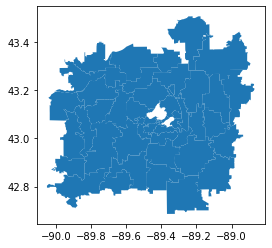

In [14]:
zcta_dane.plot()

In [15]:
zips=list(zcta_dane['ZCTA5'].unique())
zips

['53792',
 '53583',
 '53911',
 '53571',
 '53715',
 '53598',
 '53703',
 '53706',
 '53572',
 '53593',
 '53521',
 '53925',
 '53528',
 '53590',
 '53711',
 '53559',
 '53575',
 '53555',
 '53523',
 '53726',
 '53960',
 '53534',
 '53515',
 '53503',
 '53507',
 '53532',
 '53527',
 '53517',
 '53536',
 '53562',
 '53589',
 '53560',
 '53717',
 '53594',
 '53578',
 '53574',
 '53597',
 '53718',
 '53719',
 '53705',
 '53508',
 '53544',
 '53558',
 '53716',
 '53713',
 '53529',
 '53704',
 '53531',
 '53516',
 '53714']

In [16]:
list(dane_county_flows_ct['geoid_o'].unique())

['55025000401',
 '55025000901',
 '55025002302',
 '55025002500',
 '55025010100',
 '55025011302',
 '55025991703',
 '55025000800',
 '55025991702',
 '55025010600',
 '55025000406',
 '55025001802',
 '55025003100',
 '55025012002',
 '55025012001',
 '55025012300',
 '55025001501',
 '55025010502',
 '55025011301',
 '55025011504',
 '55025012100',
 '55025013700',
 '55025001604',
 '55025011900',
 '55025012501',
 '55025002401',
 '55025011506',
 '55025000202',
 '55025000405',
 '55025001101',
 '55025001402',
 '55025002602',
 '55025012800',
 '55025000204',
 '55025001502',
 '55025013301',
 '55025000402',
 '55025000408',
 '55025000501',
 '55025000504',
 '55025001300',
 '55025001401',
 '55025002301',
 '55025002402',
 '55025003002',
 '55025010200',
 '55025010400',
 '55025010501',
 '55025010701',
 '55025011000',
 '55025011101',
 '55025012201',
 '55025012400',
 '55025013000',
 '55025002000',
 '55025002601',
 '55025002900',
 '55025003001',
 '55025011800',
 '55025012700',
 '55025013100',
 '55025003200',
 '550250

## Load the relational file from US Census 
## https://www2.census.gov/geo/docs/maps-data/data/rel/zcta_tract_rel_10.txt

In [22]:
# Load relationship file between ZCTA and CT
zcta_ct_relationship = pd.read_table('zcta_tract_rel_10.txt', sep=',')
print(zcta_ct_relationship.columns)
zcta_ct_relationship.head()

Index(['ZCTA5', 'STATE', 'COUNTY', 'TRACT', 'GEOID', 'POPPT', 'HUPT', 'AREAPT',
       ' AREALANDPT', 'ZPOP', 'ZHU', 'ZAREA', 'ZAREALAND', 'TRPOP', 'TRHU',
       'TRAREA', 'TRAREALAND', 'ZPOPPCT', 'ZHUPCT', 'ZAREAPCT', 'ZAREALANDPCT',
       'TRPOPPCT', 'TRHUPCT', 'TRAREAPCT', 'TRAREALANDPCT'],
      dtype='object')


,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,TRAREA,TRAREALAND,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT
0,601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,44924558,44833897,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42
1,601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,37782601,37191697,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36
2,601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,44969548,44809680,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00
3,601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,1981101,1981101,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00
4,601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,1380041,1380041,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00


In [23]:
## fill the missing zeros at the head
# Assign GEOID at multiple levels
zcta_ct_relationship["ct"] = zcta_ct_relationship["GEOID"].apply(lambda x: str(x).zfill(11))
zcta_ct_relationship["county"] = zcta_ct_relationship["GEOID"].apply(lambda x: str(x).zfill(11)[:5])
zcta_ct_relationship["ZCTA5"] = zcta_ct_relationship["ZCTA5"].apply(lambda x: str(x).zfill(5))
zcta_ct_relationship.head(5)

,ZCTA5,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,AREAPT,AREALANDPT,ZPOP,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,00601,72,1,956300,72001956300,4271,1706,44663250,44572589,18570,...,23.00,22.03,26.67,26.74,98.5,98.33,99.42,99.42,72001956300,72001
1,00601,72,1,956400,72001956400,2384,1037,32830481,32492074,18570,...,12.84,13.39,19.61,19.50,79.6,80.14,86.89,87.36,72001956400,72001
2,00601,72,1,956500,72001956500,3126,1240,44969548,44809680,18570,...,16.83,16.01,26.85,26.89,100.0,100.00,100.00,100.00,72001956500,72001
3,00601,72,1,956600,72001956600,2329,972,1981101,1981101,18570,...,12.54,12.55,1.18,1.19,100.0,100.00,100.00,100.00,72001956600,72001
4,00601,72,1,956700,72001956700,2053,948,1380041,1380041,18570,...,11.06,12.24,0.82,0.83,100.0,100.00,100.00,100.00,72001956700,72001


In [32]:
type(zcta_ct_relationship)

pandas.core.frame.DataFrame

# Join ZCTA and CT data in the County

In [46]:
zcta_ct_relationship_dane = pd.merge(left=zcta_dane, right=zcta_ct_relationship, on="ZCTA5")
zcta_ct_relationship_dane.head()

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,0.00,0.00,100.00,100.00,0.00,0.00,2.15,2.20,55025003200,55025
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,21,970800,55021970800,53,61,...,0.92,2.45,0.20,0.14,0.95,2.27,0.33,0.23,55021970800,55021
2,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,12900,55025012900,1442,578,...,25.09,23.21,32.93,33.50,38.49,35.14,27.81,27.56,55025012900,55025
3,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,13100,55025013100,14,6,...,0.24,0.24,0.11,0.12,0.31,0.30,0.18,0.18,55025013100,55025
4,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,111,600,55111000600,974,403,...,16.95,16.18,10.94,11.45,14.81,14.25,10.43,10.47,55111000600,55111


<AxesSubplot:>

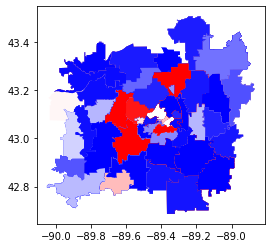

In [47]:
zcta_ct_relationship_dane.plot("TRPOPPCT", cmap="bwr")

## Transform OD flow data
## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html


In [49]:
zcta_ct_relationship_dane['GEOID'] = zcta_ct_relationship_dane['GEOID'].astype(str) # Multiple columns string conversion
zcta_ct_relationship_dane

,ZCTA5,ALAND10,AWATER10,geometry,STATE,COUNTY,TRACT,GEOID,POPPT,HUPT,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,53792,54498,0,"POLYGON ((-89.43192 43.07882, -89.43091 43.078...",55,25,3200,55025003200,0,0,...,0.00,0.00,100.00,100.00,0.00,0.00,2.15,2.20,55025003200,55025
1,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,21,970800,55021970800,53,61,...,0.92,2.45,0.20,0.14,0.95,2.27,0.33,0.23,55021970800,55021
2,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,12900,55025012900,1442,578,...,25.09,23.21,32.93,33.50,38.49,35.14,27.81,27.56,55025012900,55025
3,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,25,13100,55025013100,14,6,...,0.24,0.24,0.11,0.12,0.31,0.30,0.18,0.18,55025013100,55025
4,53583,197458833,9421762,"MULTIPOLYGON (((-89.92825 43.26930, -89.92762 ...",55,111,600,55111000600,974,403,...,16.95,16.18,10.94,11.45,14.81,14.25,10.43,10.47,55111000600,55111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,53714,11965148,67482,"POLYGON ((-89.34037 43.10522, -89.33690 43.104...",55,25,2603,55025002603,577,277,...,3.50,3.75,8.06,8.10,10.99,12.14,15.25,15.25,55025002603,55025
269,53714,11965148,67482,"POLYGON ((-89.34037 43.10522, -89.33690 43.104...",55,25,2700,55025002700,3166,1624,...,19.23,21.97,26.09,25.86,100.00,100.00,98.54,98.52,55025002700,55025
270,53714,11965148,67482,"POLYGON ((-89.34037 43.10522, -89.33690 43.104...",55,25,3001,55025003001,5042,1993,...,30.63,26.97,30.80,30.97,98.21,98.08,98.05,98.05,55025003001,55025
271,53714,11965148,67482,"POLYGON ((-89.34037 43.10522, -89.33690 43.104...",55,25,3002,55025003002,3732,1561,...,22.67,21.12,15.89,15.98,100.00,100.00,100.00,100.00,55025003002,55025


In [50]:
print(dane_county_flows_ct.dtypes)

geoid_o           object
geoid_d           object
lng_o            float64
lat_o            float64
lng_d            float64
lat_d            float64
date_range        object
visitor_flows      int64
pop_flows        float64
dtype: object


In [52]:
dane_county_flows_ct_zcta = pd.merge(left=dane_county_flows_ct, right=zcta_ct_relationship_dane,left_on="geoid_o", right_on="GEOID")

dane_county_flows_ct_zcta


,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows,ZCTA5,...,ZPOPPCT,ZHUPCT,ZAREAPCT,ZAREALANDPCT,TRPOPPCT,TRHUPCT,TRAREAPCT,TRAREALANDPCT,ct,county
0,55025000401,55025000300,-89.448349,43.054707,-89.460265,43.067650,01/04/21 - 01/10/21,15,1326.0,53711,...,6.78,7.24,2.38,2.70,98.48,98.64,98.24,98.24,55025000401,55025
1,55025000401,55025000300,-89.448349,43.054707,-89.460265,43.067650,01/04/21 - 01/10/21,15,1326.0,53705,...,0.20,0.16,0.19,0.19,1.52,1.36,1.76,1.76,55025000401,55025
2,55025000401,55025000600,-89.448349,43.054707,-89.457850,43.025689,01/04/21 - 01/10/21,4,353.0,53711,...,6.78,7.24,2.38,2.70,98.48,98.64,98.24,98.24,55025000401,55025
3,55025000401,55025000600,-89.448349,43.054707,-89.457850,43.025689,01/04/21 - 01/10/21,4,353.0,53705,...,0.20,0.16,0.19,0.19,1.52,1.36,1.76,1.76,55025000401,55025
4,55025000401,55025000100,-89.448349,43.054707,-89.475453,43.082941,01/04/21 - 01/10/21,4,353.0,53711,...,6.78,7.24,2.38,2.70,98.48,98.64,98.24,98.24,55025000401,55025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10079,55025012202,55025012202,-89.237087,42.928356,-89.237087,42.928356,01/04/21 - 01/10/21,365,7440.0,53589,...,34.87,33.32,2.24,2.40,100.00,100.00,100.00,100.00,55025012202,55025
10080,55025012202,55025012300,-89.237087,42.928356,-89.214768,42.900296,01/04/21 - 01/10/21,192,3913.0,53589,...,34.87,33.32,2.24,2.40,100.00,100.00,100.00,100.00,55025012202,55025
10081,55025012202,55025010903,-89.237087,42.928356,-89.551370,43.030590,01/04/21 - 01/10/21,4,81.0,53589,...,34.87,33.32,2.24,2.40,100.00,100.00,100.00,100.00,55025012202,55025
10082,55025012202,55025001300,-89.237087,42.928356,-89.391536,43.054143,01/04/21 - 01/10/21,12,244.0,53589,...,34.87,33.32,2.24,2.40,100.00,100.00,100.00,100.00,55025012202,55025


In [ ]:
## rename a column 
## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
